In [116]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [117]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [118]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [119]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') + pd.DateOffset(hours=1)

In [120]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [6]:
list_stations = [WS100_rtu, WS300_rtu, Raine_rtu, L_pcp_rtu, lhg_rtu]

In [7]:
station = WS300_rtu

start_date = station.index.min()
end_date = station.index.max()
print(len(station.index))
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
print(len(new_index))
station = station.reindex(new_index)

1575142
1576787


In [122]:
start_date = WS100_rtu.index.min()
end_date = WS100_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS100_rtu = WS100_rtu.reindex(new_index)

start_date = WS300_rtu.index.min()
end_date = WS300_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS300_rtu = WS300_rtu.reindex(new_index)

start_date = Raine_rtu.index.min()
end_date = Raine_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
Raine_rtu = Raine_rtu.reindex(new_index)

start_date = L_pcp_rtu.index.min()
end_date = L_pcp_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
L_pcp_rtu = L_pcp_rtu.reindex(new_index)

start_date = lhg_rtu.index.min()
end_date = lhg_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='5min')
lhg_rtu = lhg_rtu.reindex(new_index)

In [123]:
WS300_rtu.isna().sum()

absolute_humidity         1658
air_temperature         150610
ambient_pressure          1658
dewpoint                311949
precipitation           495455
precipitation.1         495456
relative_humidity         1658
absolute_humidity.1    1401478
air_temperature.1      1420771
ambient_pressure.1     1401478
dewpoint.1             1439037
precipitation.2        1450858
precipitation.3        1450858
relative_humidity.1    1401478
absolute_humidity.2    1524283
air_temperature.2      1529232
ambient_pressure.2     1524283
dewpoint.2             1534615
precipitation.4        1540743
precipitation.5        1540743
relative_humidity.2    1524283
dtype: int64

In [121]:
WS300_rtu.isna().sum()

absolute_humidity           13
air_temperature         148965
ambient_pressure            13
dewpoint                310304
precipitation           493810
precipitation.1         493811
relative_humidity           13
absolute_humidity.1    1399833
air_temperature.1      1419126
ambient_pressure.1     1399833
dewpoint.1             1437392
precipitation.2        1449213
precipitation.3        1449213
relative_humidity.1    1399833
absolute_humidity.2    1522638
air_temperature.2      1527587
ambient_pressure.2     1522638
dewpoint.2             1532970
precipitation.4        1539098
precipitation.5        1539098
relative_humidity.2    1522638
dtype: int64

In [9]:
new_index[~new_index.isin(station.index)]

DatetimeIndex([], dtype='datetime64[ns]', freq='5T')

In [10]:
# WS300_rtu.loc['2021-02-24 07:54:00']

In [11]:
WS300_rtu[~WS300_rtu.index.isin(new_index)].index

DatetimeIndex(['2020-10-23 09:00:00', '2020-10-23 09:01:00',
               '2020-10-23 09:02:00', '2020-10-23 09:03:00',
               '2020-10-23 09:04:00', '2020-10-23 09:05:00',
               '2020-10-23 09:06:00', '2020-10-23 09:07:00',
               '2020-10-23 09:08:00', '2020-10-23 09:09:00',
               ...
               '2023-10-23 08:37:00', '2023-10-23 08:38:00',
               '2023-10-23 08:39:00', '2023-10-23 08:40:00',
               '2023-10-23 08:41:00', '2023-10-23 08:42:00',
               '2023-10-23 08:43:00', '2023-10-23 08:44:00',
               '2023-10-23 08:45:00', '2023-10-23 08:46:00'],
              dtype='datetime64[ns]', length=1283927, freq=None)

In [12]:
# reindex, sodass keine Timestamp lücken vorhanden sind

for station in list_stations:

    start_date = station.index.min()
    end_date = station.index.max()
    new_index = pd.date_range(start=start_date, end=end_date, freq='min')
    station = station.reindex(new_index)

In [13]:
WS300_rtu.loc['2021-02-24 07:54:00']

absolute_humidity     NaN
air_temperature       NaN
ambient_pressure      NaN
dewpoint              NaN
precipitation         NaN
precipitation.1       NaN
relative_humidity     NaN
absolute_humidity.1   NaN
air_temperature.1     NaN
ambient_pressure.1    NaN
dewpoint.1            NaN
precipitation.2       NaN
precipitation.3       NaN
relative_humidity.1   NaN
absolute_humidity.2   NaN
air_temperature.2     NaN
ambient_pressure.2    NaN
dewpoint.2            NaN
precipitation.4       NaN
precipitation.5       NaN
relative_humidity.2   NaN
Name: 2021-02-24 07:54:00, dtype: float64

In [14]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [15]:
WS100_rtu_1M = fct.resampleDf(WS100_rtu, '1M', max_nan=1000000000)
WS100_rtu_3M = fct.resampleDf(WS100_rtu, '3M', max_nan=1000000000)
WS100_rtu_6M = fct.resampleDf(WS100_rtu, '6M', max_nan=1000000000)
WS100_rtu_1Y = fct.resampleDf(WS100_rtu, '1Y', max_nan=1000000000)

In [16]:
summen_WS100 = pd.concat([WS100_rtu_1M['precipitation.1'], WS100_rtu_3M['precipitation.1'], WS100_rtu_6M['precipitation.1'], WS100_rtu_1Y['precipitation.1']], axis=1)
summen_WS100.columns = ['1M', '3M', '6M', '1Y']
summen_WS100.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_6452\3212098018.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS100.fillna('', inplace=True)


In [17]:
# summen_WS100 # bis auf 1M Resample wurden die anderen Resamples mit leave_nan=False gemacht

In [18]:
WS300_rtu_1M = fct.resampleDf(WS300_rtu, '1M', max_nan=1000000000)
WS300_rtu_3M = fct.resampleDf(WS300_rtu, '3M', max_nan=1000000000)
WS300_rtu_6M = fct.resampleDf(WS300_rtu, '6M', max_nan=1000000000)
WS300_rtu_1Y = fct.resampleDf(WS300_rtu, '1Y', max_nan=1000000000)

In [19]:
summen_WS300 = pd.concat([WS300_rtu_1M['precipitation.1'], WS300_rtu_3M['precipitation.1'], WS300_rtu_6M['precipitation.1'], WS300_rtu_1Y['precipitation.1']], axis=1)
summen_WS300.columns = ['1M', '3M', '6M', '1Y']
summen_WS300.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_6452\1589562735.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summen_WS300.fillna('', inplace=True)


In [20]:
# summen_WS300

In [21]:
Raine_rtu_1M = fct.resampleDf(Raine_rtu, '1M', max_nan=1000000000)
Raine_rtu_3M = fct.resampleDf(Raine_rtu, '3M', max_nan=1000000000)
Raine_rtu_6M = fct.resampleDf(Raine_rtu, '6M', max_nan=1000000000)
Raine_rtu_1Y = fct.resampleDf(Raine_rtu, '1Y', max_nan=1000000000)

In [22]:
summe_Raine = pd.concat([Raine_rtu_1M['Niederschlagsmenge'], Raine_rtu_3M['Niederschlagsmenge'], Raine_rtu_6M['Niederschlagsmenge'], Raine_rtu_1Y['Niederschlagsmenge']], axis=1)
summe_Raine.columns = ['1M', '3M', '6M', '1Y']
summe_Raine.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_6452\2636199226.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_Raine.fillna('', inplace=True)


In [23]:
L_pcp_rtu_1M = fct.resampleDf(L_pcp_rtu, '1M', max_nan=1000000000)
L_pcp_rtu_3M = fct.resampleDf(L_pcp_rtu, '3M', max_nan=1000000000)
L_pcp_rtu_6M = fct.resampleDf(L_pcp_rtu, '6M', max_nan=1000000000)
L_pcp_rtu_1Y = fct.resampleDf(L_pcp_rtu, '1Y', max_nan=1000000000)

In [24]:
summe_L_pcp = pd.concat([L_pcp_rtu_1M, L_pcp_rtu_3M, L_pcp_rtu_6M, L_pcp_rtu_1Y], axis=1)
# summe_L_pcp.columns = ['', '1M', '', '', '3M', '', '', '6M', '', '', '1Y', '',]
summe_L_pcp.columns = pd.MultiIndex.from_tuples([('1M', 'rr07'), ('1M', 'rr09'), ('1M', 'rr10'), 
                                                 ('3M', 'rr07'), ('3M', 'rr09'), ('3M', 'rr10'), 
                                                 ('6M', 'rr07'), ('6M', 'rr09'), ('6M', 'rr10'), 
                                                 ('1Y', 'rr07'), ('1Y', 'rr09'), ('1Y', 'rr10')])
summe_L_pcp.fillna('', inplace=True)

C:\Users\illic\AppData\Local\Temp\ipykernel_6452\4113631705.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  summe_L_pcp.fillna('', inplace=True)


In [25]:
summen_alle_Stationen = pd.concat([summen_WS100, summen_WS300, summe_Raine, summe_L_pcp], axis=1)

In [26]:
# summen_WS100.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS100.csv', sep=';')
# summen_WS300.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS300.csv', sep=';')
# summe_Raine.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_Raine.csv', sep=';')
# summe_L_pcp.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_L_pcp.csv', sep=';')

In [27]:
# dataframe = L_pcp_rtu_1M
# column = 'rr_07'
# name = 'rr_07 1M Resample'

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

# ax.set_title(name)
# ax.set_xlabel('DateTime')
# ax.set_ylabel('Precipitation in [mm]')

# # timedelta = dataframe.index[2] - dataframe.index[1]

# # if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
# if len(dataframe.index) > 40:
#     plt.xticks(dataframe.index[::3], rotation=45)
# else:
#     plt.xticks(dataframe.index, rotation=45)
    
# plt.yticks(rotation=45)

# plt.show()

In [28]:
len(WS100_rtu.index.to_period('M').unique())

25

In [153]:
df = L_pcp_rtu
column = 'rr_10'
timedelta = '1Y'

if timedelta == '3M':
    laenge_monate = 3
elif timedelta == '6M':
    laenge_monate = 6
elif timedelta == '1Y':
    laenge_monate = 12

df = df.groupby([df.index.year, df.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

while (len(df[column].index.to_period('M').unique())/laenge_monate).is_integer() == False:
    print('months:', len(df[column].index.to_period('M').unique()))
    # schauen, ob erster oder letzter Monat mehr brauchbare Werte hat
    # den Monat mit weniger brauchbaren Werten (also mehr nans) verwerfen
    
    date_start_a = df[column].index[0]
    date_end_a = df[column].index[0] + pd.DateOffset(months=1)
    sum_nans_a = df[column].loc[date_start_a : date_end_a].isna().sum()

    date_start_e = df[column].index[-1] - pd.DateOffset(months=1)
    date_end_e = df[column].index[-1]
    sum_nans_e = df[column].loc[date_start_e : date_end_e].isna().sum()

    if sum_nans_a > sum_nans_e:
        mask = (df[column].index >= date_start_a) & (df[column].index <= date_end_a)
        df = df.loc[~mask]
        print('month anfang')
    else:
        mask = (df[column].index >= date_start_e) & (df[column].index <= date_end_e)
        df = df.loc[~mask]
        print('month ende')
    print('sum nans:', sum_nans_a, sum_nans_e)
print(len(df[column].index.to_period('M').unique())/laenge_monate)
df = fct.resampleDf(df, timedelta, max_nan=1000000000)
df[column]

months: 50
month ende
sum nans: 0 0
months: 49
month ende
sum nans: 0 0
4.0


2020-12-31    609.54
2021-12-31    699.65
2022-12-31    634.23
2023-12-31    727.07
2024-12-31     38.83
Freq: A-DEC, Name: rr_10, dtype: float64

In [30]:
len(df.index.to_period('M').unique())

18

In [31]:
WS100_rtu

,air_temperature,precipitation,precipitation.1,precipitation.2,precipitation_intensity,precipitation_type
2021-10-20 17:00:00,18.07,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:01:00,18.13,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:02:00,18.08,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:03:00,18.14,0.0,0.0,0.0,0.0,0.0
2021-10-20 17:04:00,18.07,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-10-20 16:17:00,12.39,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:18:00,12.34,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:19:00,12.38,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:20:00,12.33,0.0,0.0,0.0,0.0,0.0


In [32]:
WS100_test = WS100_rtu.groupby([WS100_rtu.index.year, WS100_rtu.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

In [33]:
WS100_test

,air_temperature,precipitation,precipitation.1,precipitation.2,precipitation_intensity,precipitation_type
2021-11-01 00:00:00,13.16,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:01:00,13.18,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:02:00,13.15,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:03:00,13.18,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:04:00,13.24,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-09-30 23:55:00,9.79,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:56:00,9.74,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:57:00,9.58,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:58:00,9.57,0.0,0.0,0.0,0.0,0.0


In [34]:
WS100_rtu_3Mres = WS100_rtu.resample('3M')

In [35]:
WS100_rtu_nur_ganze_monate = WS100_rtu.groupby([WS100_rtu.index.year, WS100_rtu.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

In [36]:
WS100_rtu_nur_ganze_monate['precipitation.1']

2021-11-01 00:00:00    0.0
2021-11-01 00:01:00    0.0
2021-11-01 00:02:00    0.0
2021-11-01 00:03:00    0.0
2021-11-01 00:04:00    0.0
                      ... 
2023-09-30 23:55:00    0.0
2023-09-30 23:56:00    0.0
2023-09-30 23:57:00    0.0
2023-09-30 23:58:00    0.0
2023-09-30 23:59:00    0.0
Freq: T, Name: precipitation.1, Length: 1006560, dtype: float64

In [98]:
WS100_rtu_nur_ganze_monate.loc[WS100_rtu_nur_ganze_monate.index[1:]]

,air_temperature,precipitation,precipitation.1,precipitation.2,precipitation_intensity,precipitation_type
2021-11-01 00:01:00,13.18,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:02:00,13.15,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:03:00,13.18,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:04:00,13.24,0.0,0.0,0.0,0.0,0.0
2021-11-01 00:05:00,13.29,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-09-30 23:55:00,9.79,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:56:00,9.74,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:57:00,9.58,0.0,0.0,0.0,0.0,0.0
2023-09-30 23:58:00,9.57,0.0,0.0,0.0,0.0,0.0


In [38]:
len(WS100_rtu.index.to_period('M').unique())/3

8.333333333333334

In [39]:
(len(WS100_rtu.index.to_period('M').unique())/3).is_integer()

False

In [40]:
date_start = WS100_rtu.index[0]
date_end = WS100_rtu.index[0] + pd.DateOffset(months=1)
print(WS100_rtu['precipitation.1'].loc[date_start : date_end].isna().sum())

print('date_start:', date_start)
print('date_end:', date_end)

3
date_start: 2021-10-20 17:00:00
date_end: 2021-11-20 17:00:00


In [41]:
mask = (WS100_rtu.index >= date_start) & (WS100_rtu.index <= date_end)
WS100_rtu_gehtauf = WS100_rtu.loc[~mask]

In [42]:
WS100_rtu_gehtauf

,air_temperature,precipitation,precipitation.1,precipitation.2,precipitation_intensity,precipitation_type
2021-11-20 17:01:00,4.63,0.0,0.0,0.0,0.0,0.0
2021-11-20 17:02:00,4.51,0.0,0.0,0.0,0.0,0.0
2021-11-20 17:03:00,4.52,0.0,0.0,0.0,0.0,0.0
2021-11-20 17:04:00,4.62,0.0,0.0,0.0,0.0,0.0
2021-11-20 17:05:00,4.67,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-10-20 16:17:00,12.39,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:18:00,12.34,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:19:00,12.38,0.0,0.0,0.0,0.0,0.0
2023-10-20 16:20:00,12.33,0.0,0.0,0.0,0.0,0.0


In [43]:
date_start = WS100_rtu.index[-1] - pd.DateOffset(months=1)
date_end = WS100_rtu.index[-1]
print(WS100_rtu['precipitation.1'].loc[date_start : date_end].isna().sum())

print('date_start:', date_start)
print('date_end:', date_end)

0
date_start: 2023-09-20 16:21:00
date_end: 2023-10-20 16:21:00


In [44]:
# WS100_rtu_nur_ganzes_jahr

In [45]:
WS100_rtu_nur_ganzes_jahr = WS100_rtu.groupby(WS100_rtu.index.year).filter(lambda x: len(x) == len(pd.date_range(start=f'{x.index[0].year}-01-01 01:00:00', end=f'{x.index[0].year}-12-31 23:59:00'))*24*60)

In [46]:
WS100_rtu.index.month.unique()

Index([10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int32')

In [47]:
WS100_rtu_3M.index[1].month - WS100_rtu_3M.index[0].month #== pd.DateOffset(month=3)

-9

In [48]:
WS100_rtu_3M.index[0]

Timestamp('2021-10-31 00:00:00')

In [49]:
WS100_rtu_3M.index[1]

Timestamp('2022-01-31 00:00:00')

In [50]:
# reindex, sodass keine Timestamp lücken vorhanden sind

start_date = WS100_rtu.index.min()
end_date = WS100_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS100_rtu = WS100_rtu.reindex(new_index)

In [63]:
list_stations_columns = [[WS100_rtu_1M, 'precipitation.1', 'WS100 1M Resample', '1M'], 
                        [WS100_rtu_3M, 'precipitation.1', 'WS100 3M Resample', '3M'], 
                        [WS100_rtu_6M, 'precipitation.1', 'WS100 6M Resample', '6M'], 
                        [WS100_rtu_1Y, 'precipitation.1', 'WS100 1Y Resample', '1Y'], 
                        [WS300_rtu_1M, 'precipitation.1', 'WS300 1M Resample', '1M'],
                        [WS300_rtu_3M, 'precipitation.1', 'WS300 3M Resample', '3M'],
                        [WS300_rtu_6M, 'precipitation.1', 'WS300 6M Resample', '6M'],
                        [WS300_rtu_1Y, 'precipitation.1', 'WS300 1Y Resample', '1Y'],
                        [Raine_rtu_1M, 'Niederschlagsmenge', 'Raine 1M Resample', '1M'],
                        [Raine_rtu_3M, 'Niederschlagsmenge', 'Raine 3M Resample', '3M'],
                        [Raine_rtu_6M, 'Niederschlagsmenge', 'Raine 6M Resample', '6M'],
                        [Raine_rtu_1Y, 'Niederschlagsmenge', 'Raine 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_07', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_07', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_07', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_07', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_09', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_09', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_09', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_09', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_10', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_10', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_10', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_10', 'L_pcp 1Y Resample', '1Y']]

In [140]:
list_stations_columns = [[WS100_rtu, 'precipitation.1', 'WS100 1M Resample', '1M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 3M Resample', '3M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 6M Resample', '6M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 1Y Resample', '1Y'], 
                        [WS300_rtu, 'precipitation.1', 'WS300 1M Resample', '1M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 3M Resample', '3M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 6M Resample', '6M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 1Y Resample', '1Y'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 1M Resample', '1M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 3M Resample', '3M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 6M Resample', '6M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 1Y Resample', '1Y']]

In [52]:
WS100_rtu_1M_ngm = fct.resampleDf(WS100_rtu_nur_ganze_monate, '1M', max_nan=1000000000)
# WS100_rtu_3M_ngm = fct.resampleDf(WS100_rtu, '3M', max_nan=1000000000)
# WS100_rtu_6M_ngm = fct.resampleDf(WS100_rtu, '6M', max_nan=1000000000)
WS100_rtu_1Y_ngy = fct.resampleDf(WS100_rtu_nur_ganzes_jahr, '1Y', max_nan=1000000000)

In [139]:
WS300_rtu_1M.loc['2022-10-31' : '2023-10-31'].isna().sum()

absolute_humidity      0
air_temperature        0
ambient_pressure       0
dewpoint               0
precipitation          0
precipitation.1        0
relative_humidity      0
absolute_humidity.1    0
air_temperature.1      0
ambient_pressure.1     0
dewpoint.1             0
precipitation.2        0
precipitation.3        0
relative_humidity.1    0
absolute_humidity.2    0
air_temperature.2      0
ambient_pressure.2     0
dewpoint.2             0
precipitation.4        0
precipitation.5        0
relative_humidity.2    0
dtype: int64

In [141]:
def balkendiagramm(dataframe, column, name, timedelta):

    # print(dataframe[column])

    if timedelta == '1M':
        dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)
        dataframe = fct.resampleDf(dataframe, '1M', max_nan=1000000000)
        # print(dataframe[column])
    if timedelta == '3M':
        laenge_monate = 3
    elif timedelta == '6M':
        laenge_monate = 6
    elif timedelta == '1Y':
        laenge_monate = 12

    if timedelta == '3M' or timedelta == '6M' or timedelta == '1Y':
                
        dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

        while (len(dataframe[column].index.to_period('M').unique())/laenge_monate).is_integer() == False:

            # print(len(dataframe[column].index.to_period('M').unique()))
            
            # schauen, ob erster oder letzter Monat mehr brauchbare Werte hat
            # den Monat mit weniger brauchbaren Werten (also mehr nans) verwerfen
            
            date_start_a = dataframe[column].index[0]
            date_end_a = dataframe[column].index[0] + pd.DateOffset(months=1)
            sum_nans_a = dataframe[column].loc[date_start_a : date_end_a].isna().sum()

            date_start_e = dataframe[column].index[-1] - pd.DateOffset(months=1)
            date_end_e = dataframe[column].index[-1]
            sum_nans_e = dataframe[column].loc[date_start_e : date_end_e].isna().sum()

            if sum_nans_a > sum_nans_e:
                mask = (dataframe[column].index >= date_start_a) & (dataframe[column].index <= date_end_a)
                dataframe = dataframe.loc[~mask]
            else:
                mask = (dataframe[column].index >= date_start_e) & (dataframe[column].index <= date_end_e)
                dataframe = dataframe.loc[~mask]

        # print(len(dataframe[column].index.to_period('M').unique()))
        # print(len(dataframe[column].index.to_period('M').unique())/laenge_monate)

        dataframe = fct.resampleDf(dataframe, timedelta, max_nan=1000000000) #, closed='left', label='left')
    
    # print(dataframe[column])
      
    # elif timedelta == '1Y':
    #     dataframe = dataframe.groupby(dataframe.index.year).filter(lambda x: len(x) == len(pd.date_range(start=f'{x.index[0].year}-01-01 01:00:00', end=f'{x.index[0].year}-12-31 23:59:00'))*24*60)
    dataframe = dataframe.loc[dataframe.index[1:]]
    
    fig, ax = plt.subplots()

    ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

    ax.set_title(name)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation in [mm]')

    if timedelta == '1M':
        plt.xticks(dataframe.index[::3], rotation=45)
    else:
        plt.xticks(dataframe.index, rotation=45)

    if timedelta == '1M':
        plt.ylim(0, 150)
    elif timedelta == '3M':
        plt.ylim(0, 375)
    elif timedelta == '6M':
        plt.ylim(0, 550)
    elif timedelta == '1Y':
        plt.ylim(0, 850)

    plt.yticks(rotation=45)

    plt.show()
    
    return

In [104]:
# for list in list_stations_columns:
#     if list[3] == '1Y':
#         print(list[2], list[0][list[1]].max())

In [105]:
list_stations_columns = [[WS300_rtu, 'precipitation.1', 'WS100 1M Resample', '1M'], 
                        [WS300_rtu, 'precipitation.1', 'WS100 3M Resample', '3M'], 
                        [WS300_rtu, 'precipitation.1', 'WS100 6M Resample', '6M'], 
                        [WS300_rtu, 'precipitation.1', 'WS100 1Y Resample', '1Y']]

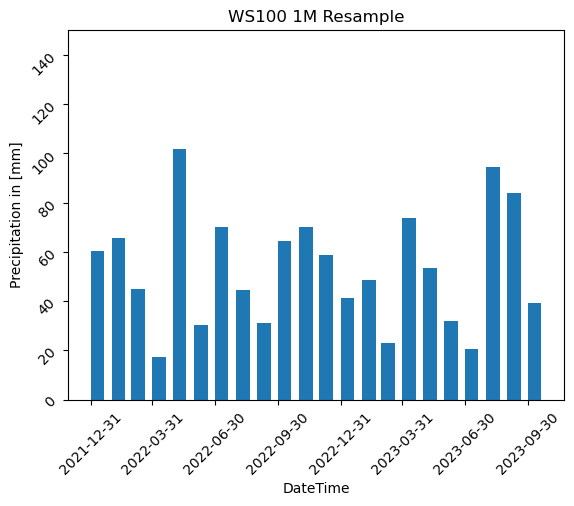

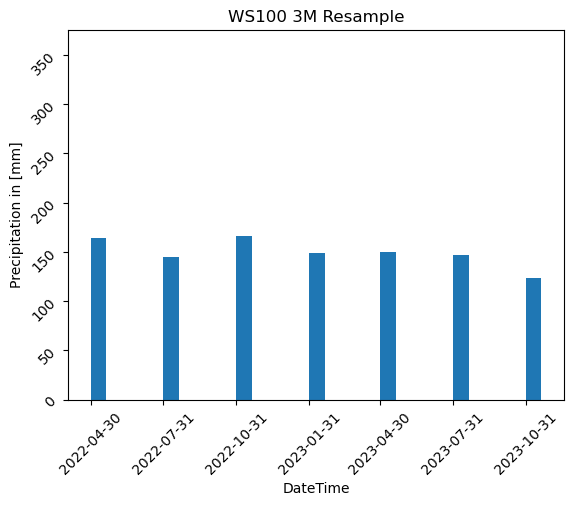

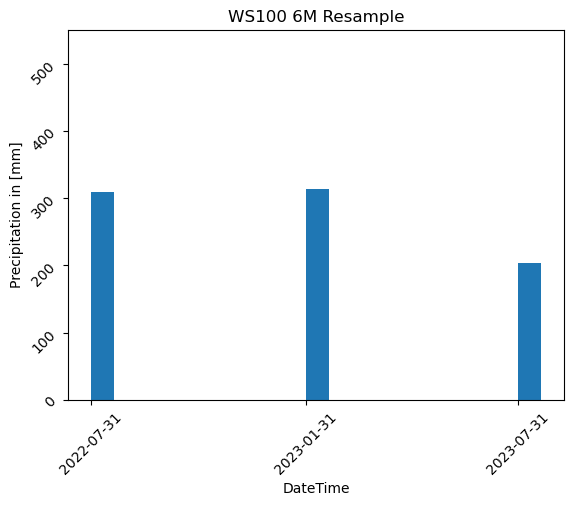

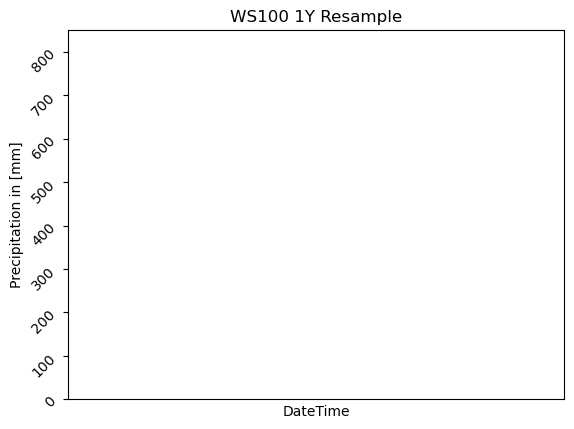

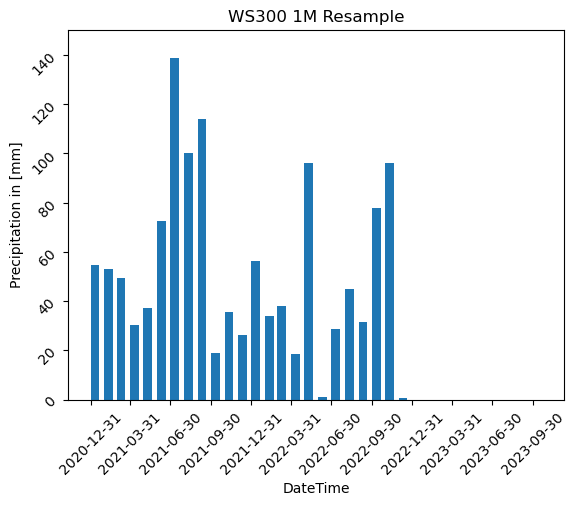

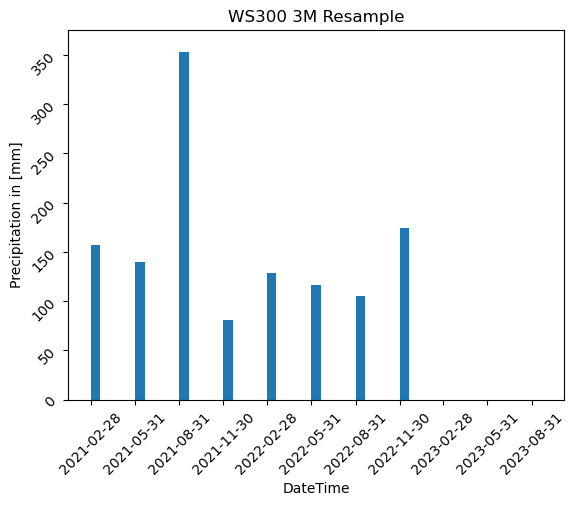

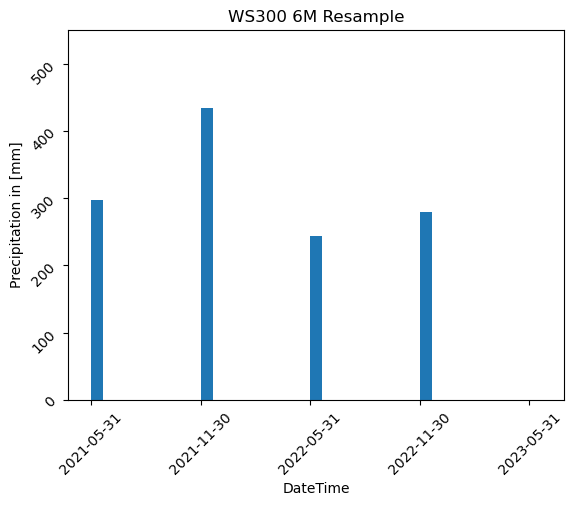

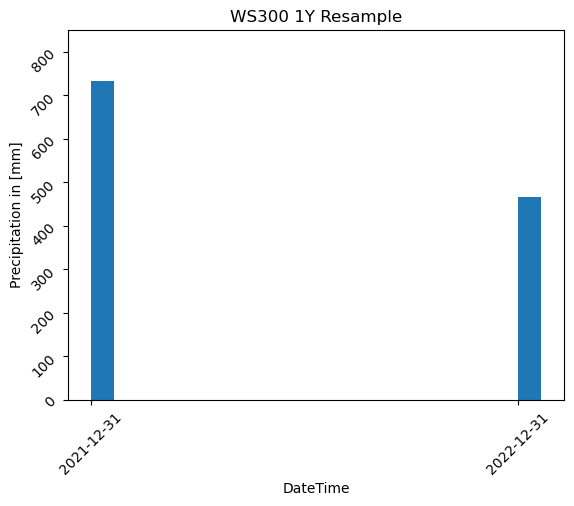

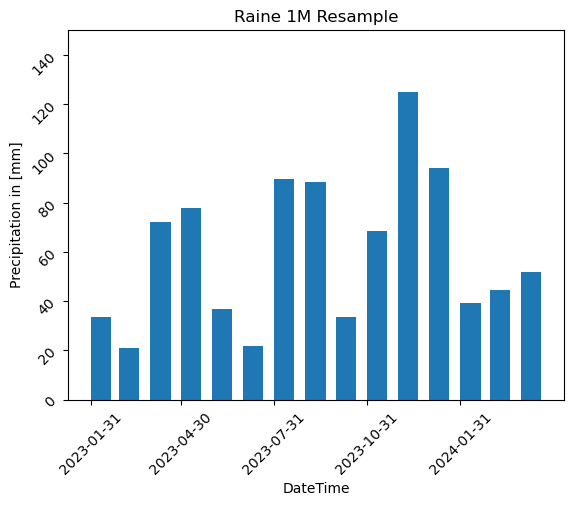

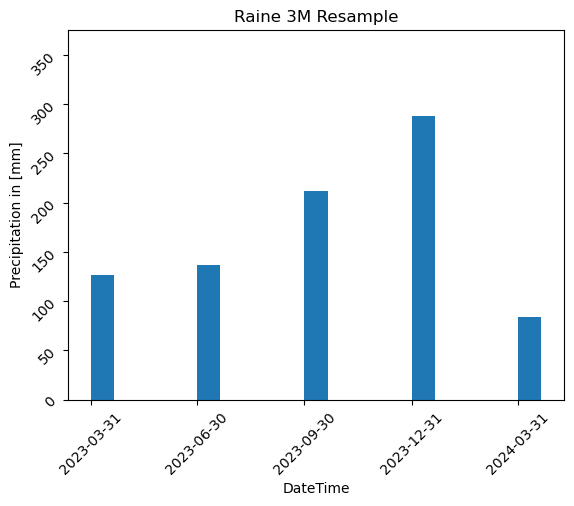

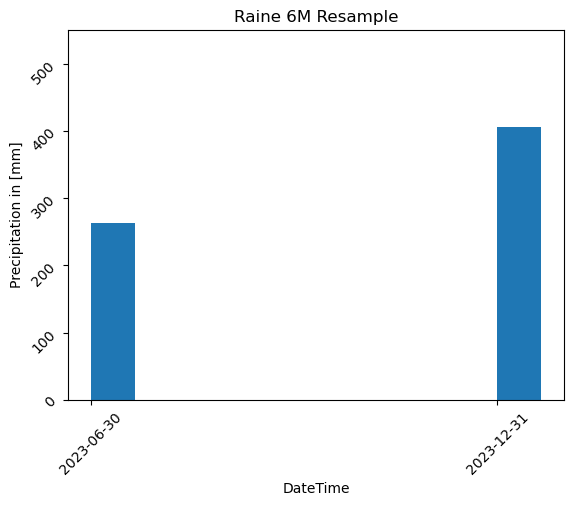

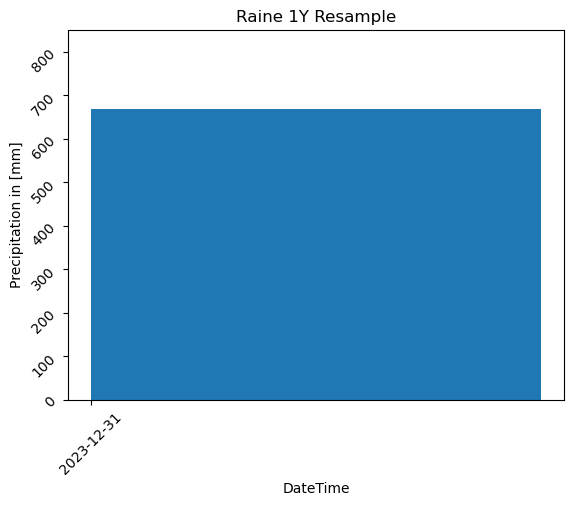

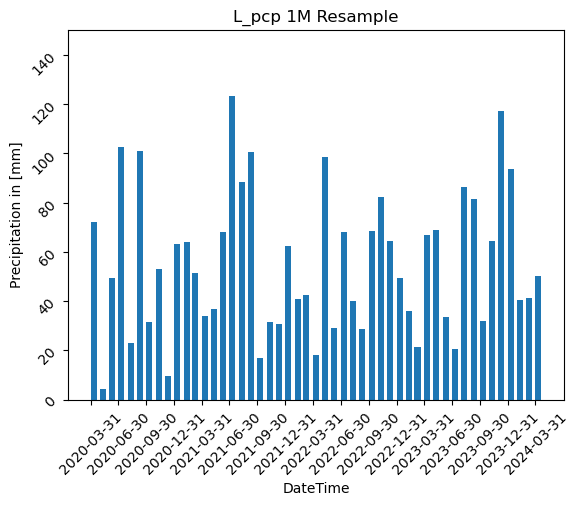

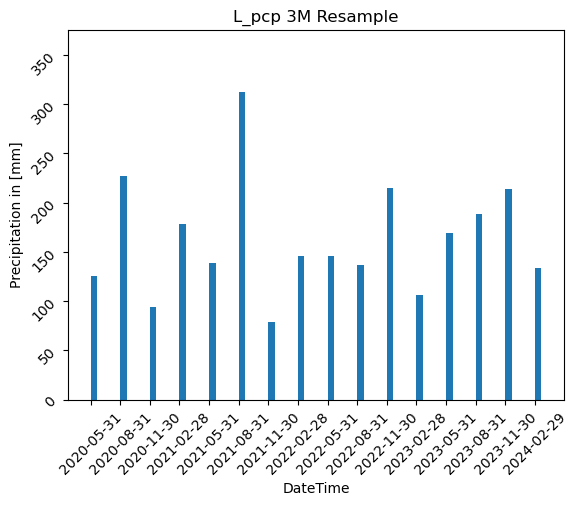

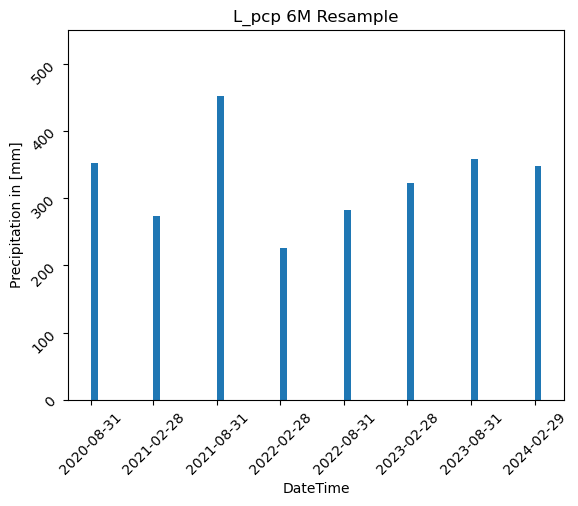

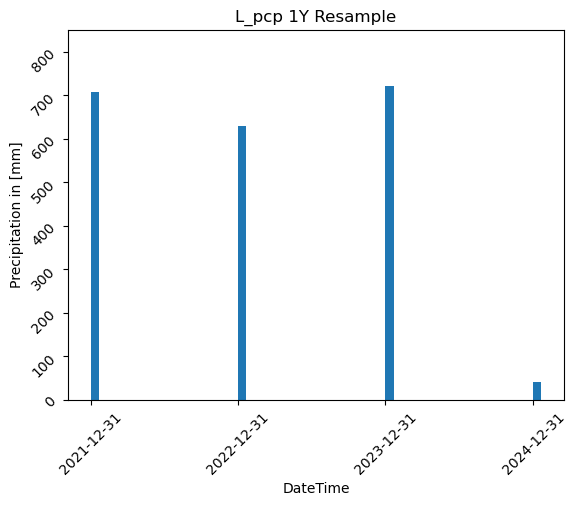

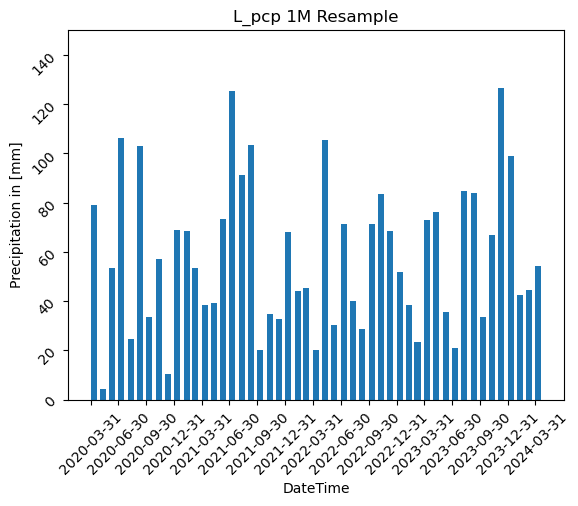

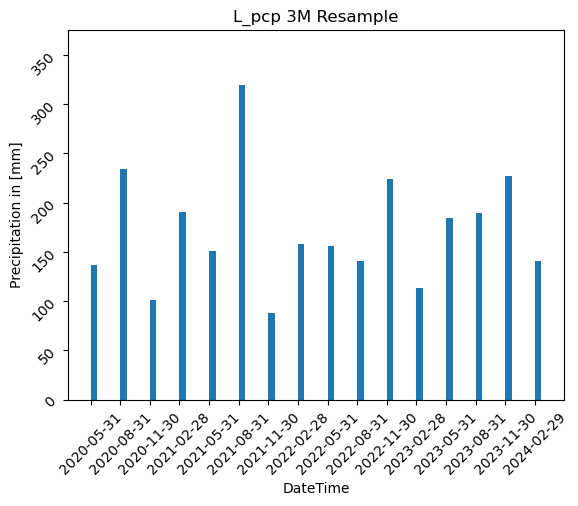

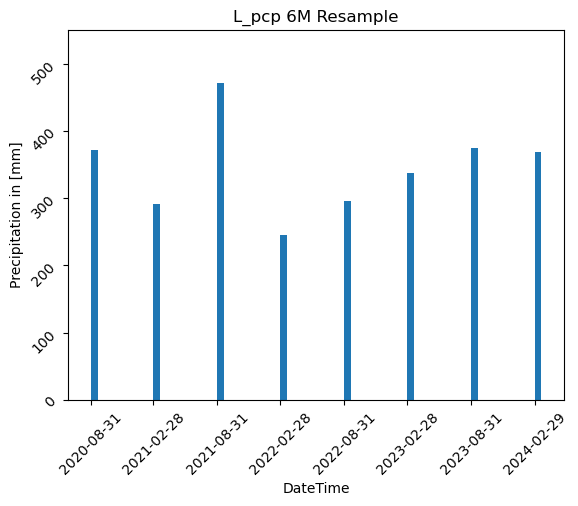

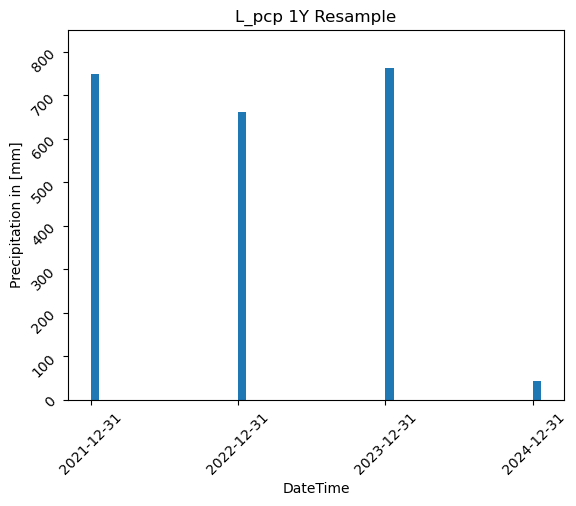

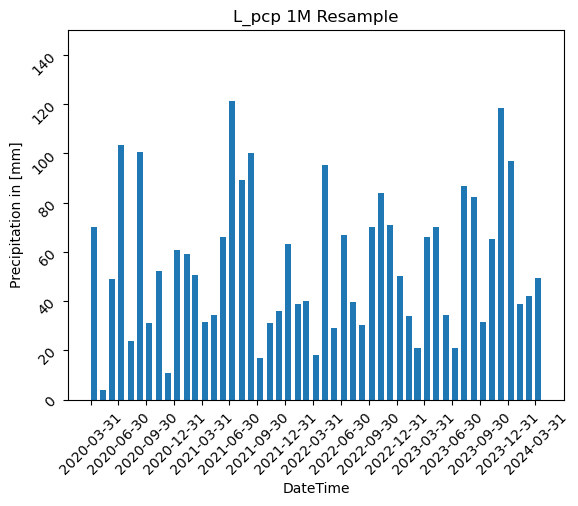

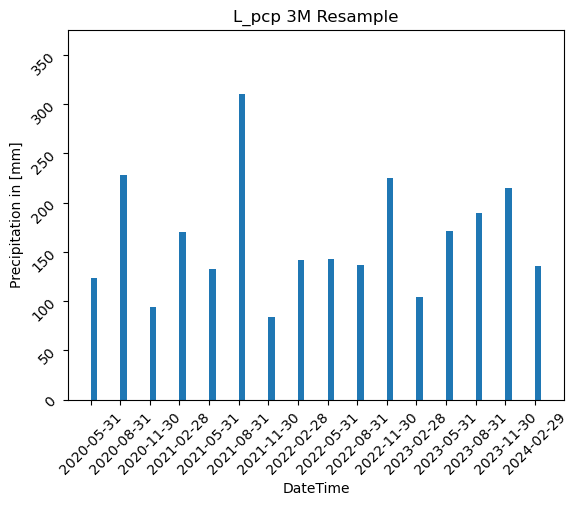

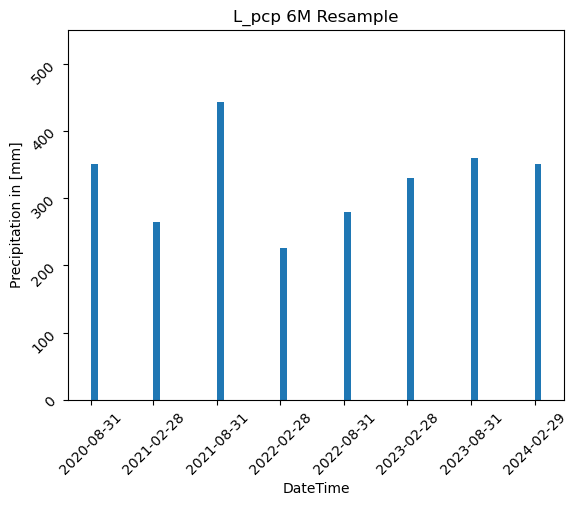

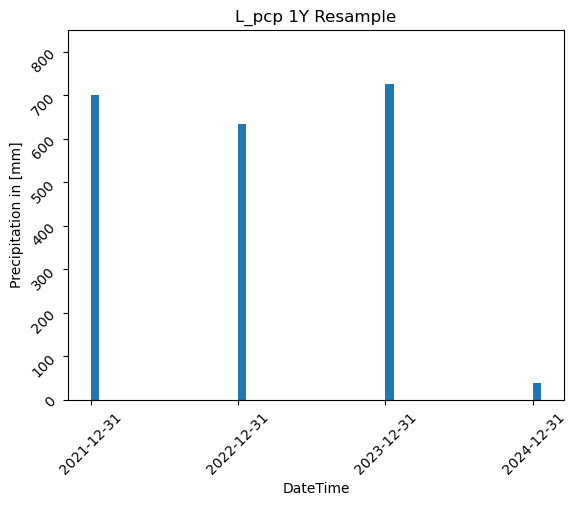

In [142]:
for list in list_stations_columns:
    balkendiagramm(list[0], list[1], list[2], list[3])

In [110]:
WS300_rtu['precipitation.1']

2020-10-23 09:00:00    0.0
2020-10-23 09:01:00    0.0
2020-10-23 09:02:00    0.0
2020-10-23 09:03:00    0.0
2020-10-23 09:04:00    0.0
                      ... 
2023-10-23 08:42:00    NaN
2023-10-23 08:43:00    NaN
2023-10-23 08:44:00    NaN
2023-10-23 08:45:00    NaN
2023-10-23 08:46:00    NaN
Freq: T, Name: precipitation.1, Length: 1576787, dtype: float64

In [46]:
# Summenwerte der verschiedenen Stationen vergleichen

In [47]:
# startindex WS100: 2021-10-20 17:00:00	
# endtindex WS100: 2023-10-20 16:21:00	

# startindex WS300: 2020-10-23 09:00:00	
# endtindex WS300: 2023-10-23 08:46:00	

# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00	

# startindex L_pcp: 2020-01-01 00:01:00	
# endtindex L_pcp: 2024-04-23 00:00:00	

# sich überschneidender Zeitraum
# startindex: 2022-11-03
# endtindex: 2023-10-23

In [48]:
# erstelle datetime index für den gesamten maximalen Zeitraum
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 4, 23)
index_max_range = pd.date_range(start, end, freq='M')

In [49]:
# erstelle datetime index für den sich überschneidenden Zeitraum aller Stationen
start = datetime.datetime(2022, 11, 3)
end = datetime.datetime(2023, 10, 23)
index_überschneidend = pd.date_range(start, end, freq='M')

In [50]:
# # 1M
list_stations = [WS100_rtu_1M['precipitation.1'], WS300_rtu_1M['precipitation.1'], Raine_rtu_1M['Niederschlagsmenge'], L_pcp_rtu_1M['rr_07'], L_pcp_rtu_1M['rr_09'], L_pcp_rtu_1M['rr_10']]
# # 3M
# list_stations = [WS100_rtu_3M['precipitation.1'], WS300_rtu_3M['precipitation.1'], Raine_rtu_3M['Niederschlagsmenge'], L_pcp_rtu_3M['rr_07'], L_pcp_rtu_3M['rr_09'], L_pcp_rtu_3M['rr_10']]
# # 6M
# list_stations = [WS100_rtu_6M['precipitation.1'], WS300_rtu_6M['precipitation.1'], Raine_rtu_6M['Niederschlagsmenge'], L_pcp_rtu_6M['rr_07'], L_pcp_rtu_6M['rr_09'], L_pcp_rtu_6M['rr_10']]
# # 1Y
# list_stations = [WS100_rtu_1Y['precipitation.1'], WS300_rtu_1Y['precipitation.1'], Raine_rtu_1Y['Niederschlagsmenge'], L_pcp_rtu_1Y['rr_07'], L_pcp_rtu_1Y['rr_09'], L_pcp_rtu_1Y['rr_10']]

list_min_max_precip = [] # ['---', 'Sum_values_1M', '---']
list_min_max_index = []

for index in index_max_range:

    min_sum_val = 1000000000000
    min_found = False
    max_sum_val = 0
    max_found = False

    for station in list_stations:
        try:
            if station.loc[index] < min_sum_val:
                min_sum_val = station.loc[index]
                min_found = True
            if station.loc[index] > max_sum_val:
                max_sum_val = station.loc[index]
                max_found = True
        except KeyError:
            pass
    # if min_found and max_found == False:
    #     list_min_max_precip.append([index, round(min_sum_val, 2), 'No max value found'])
    # elif max_found and min_found == False:
    #     list_min_max_precip.append([index, 'No min value found', round(max_sum_val, 2)])
    # elif max_found and min_found:
    if min_found and max_found:
        # list_min_max_precip.append([index, round(min_sum_val, 2), round(max_sum_val, 2)])
        list_min_max_precip.append(round(max_sum_val - min_sum_val, 2))
        list_min_max_index.append(index)

In [51]:
# ausreißer = [x for x in list_min_max_precip if x > 18]

In [52]:
# index_ausreißer = [list_min_max_index[i] for i in [list_min_max_precip.index(ar) for ar in ausreißer]]

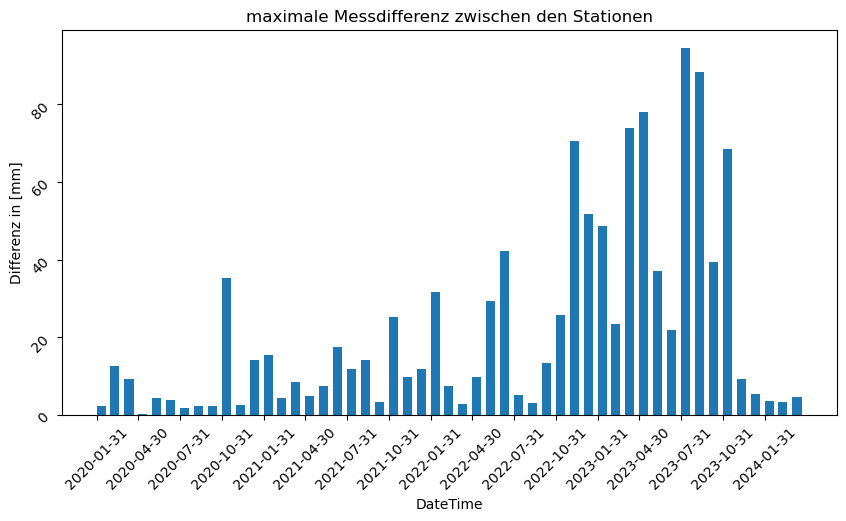

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(list_min_max_index, list_min_max_precip, width=20, align='edge')

ax.set_title('maximale Messdifferenz zwischen den Stationen')
ax.set_xlabel('DateTime')
ax.set_ylabel('Differenz in [mm]')

timedelta = list_min_max_index[2] - list_min_max_index[1]
if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
        plt.xticks(list_min_max_index[::3], rotation=45)
else:
    plt.xticks(list_min_max_index, rotation=45)
    
plt.yticks(rotation=45)

plt.show()

In [54]:
# for index in index_ausreißer:
#     print(summen_alle_Stationen.loc[index])

In [55]:
# WS100_rtu_1Y['precipitation.1']

In [56]:
# WS300_rtu_1Y['precipitation.1']

In [57]:
# Raine_rtu_1Y['Niederschlagsmenge']

In [58]:
# L_pcp_rtu_1Y

In [59]:
# summen_alle_Stationen.loc['31-10-2023']

In [60]:
# len(index_max_range)

In [61]:
# print(list_min_max_precip)

In [62]:
# differenz für die jeweiligen Monate plotten

In [63]:
summen_alle_Stationen.fillna('', inplace=True)

In [64]:
# summen_alle_Stationen

In [65]:
# summen_alle_Stationen = summen_alle_Stationen.applymap(lambda x: np.nan if isinstance(x, str) else x)

In [66]:
# summen_alle_Stationen

In [67]:
# zahl_mal_2 = lambda x, y: x * 2 + y

In [68]:
# zahl_mal_2(3, 4)

In [69]:
# summe_L_pcp[('1M', 'rr07')]

In [70]:
# Vergleiche Statoinen mit Raine
#
#
#
#
# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00

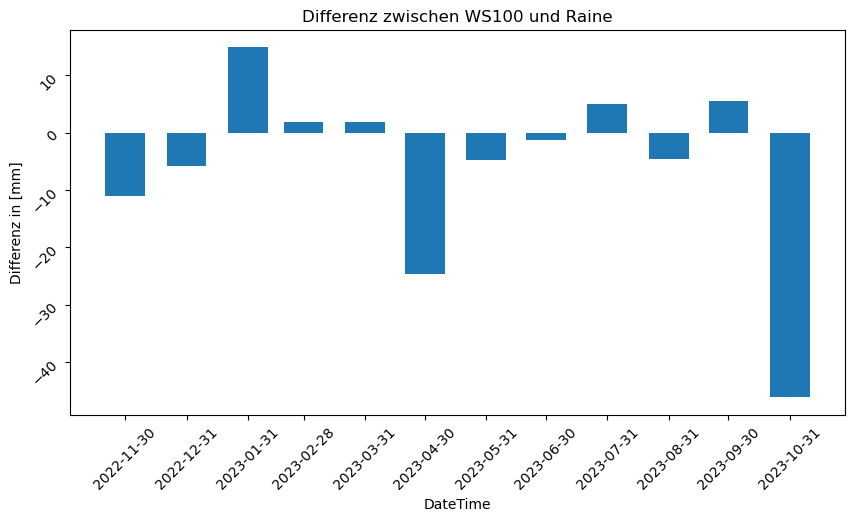

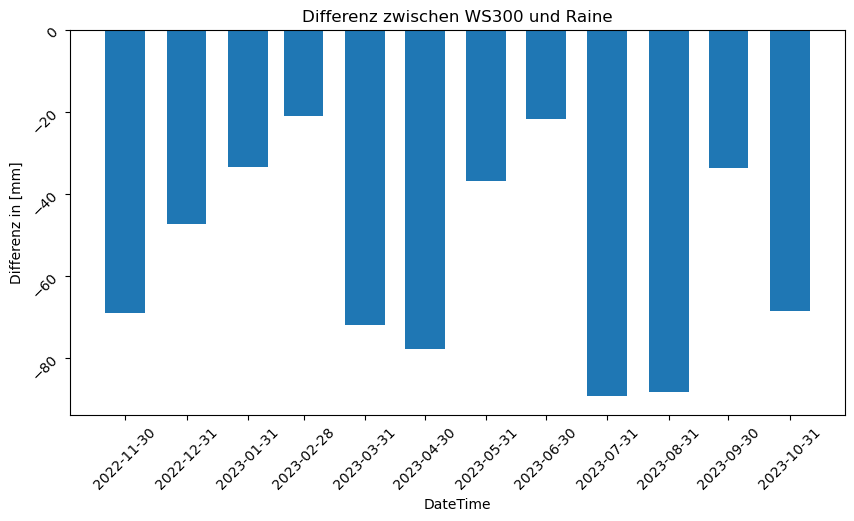

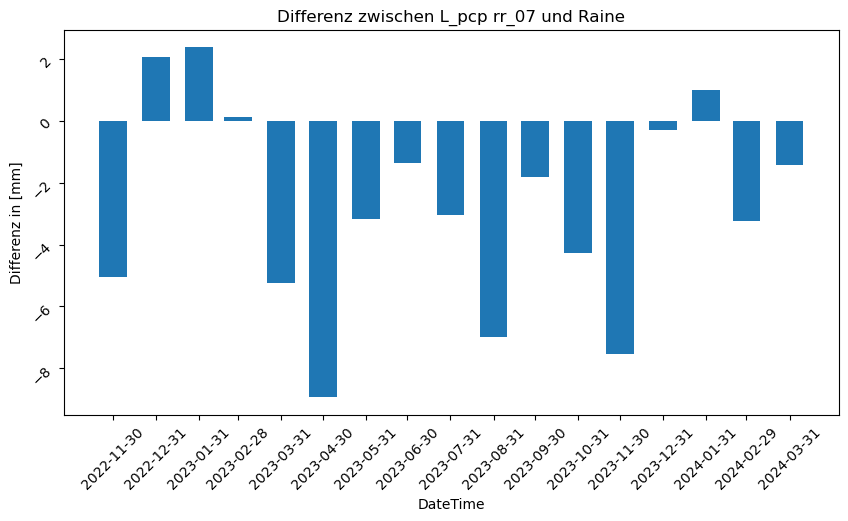

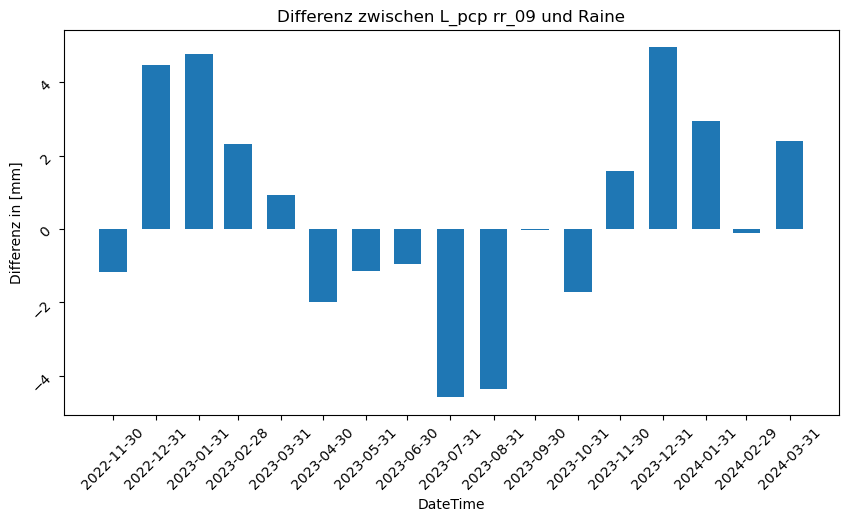

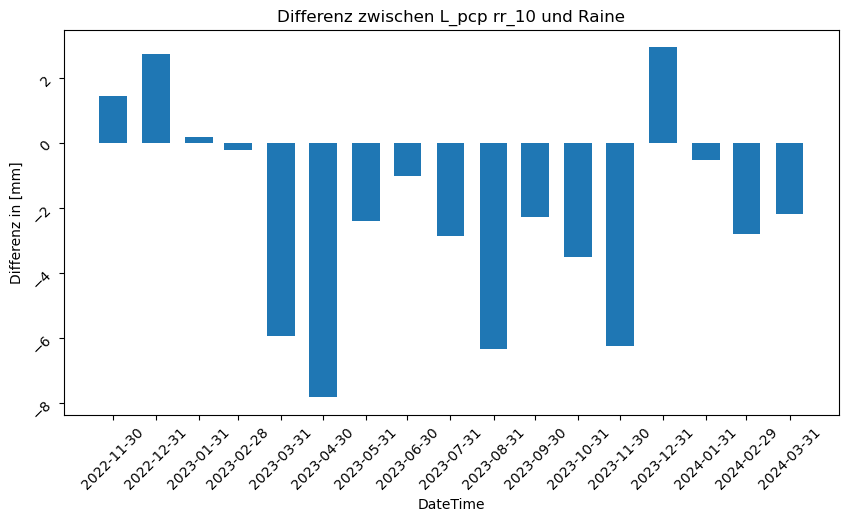

In [71]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[WS100_rtu_1M['precipitation.1'], 'WS100', 'Raine'], 
                [WS300_rtu_1M['precipitation.1'], 'WS300', 'Raine'],
                [L_pcp_rtu_1M['rr_07'], 'L_pcp rr_07', 'Raine'],
                [L_pcp_rtu_1M['rr_09'], 'L_pcp rr_09', 'Raine'],
                [L_pcp_rtu_1M['rr_10'], 'L_pcp rr_10', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    for index in index_max_range:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
        
    plt.yticks(rotation=45)

    plt.show()

In [72]:
# same_index = reference.index.intersection(station.index)

In [73]:
import matplotlib.dates as mdates

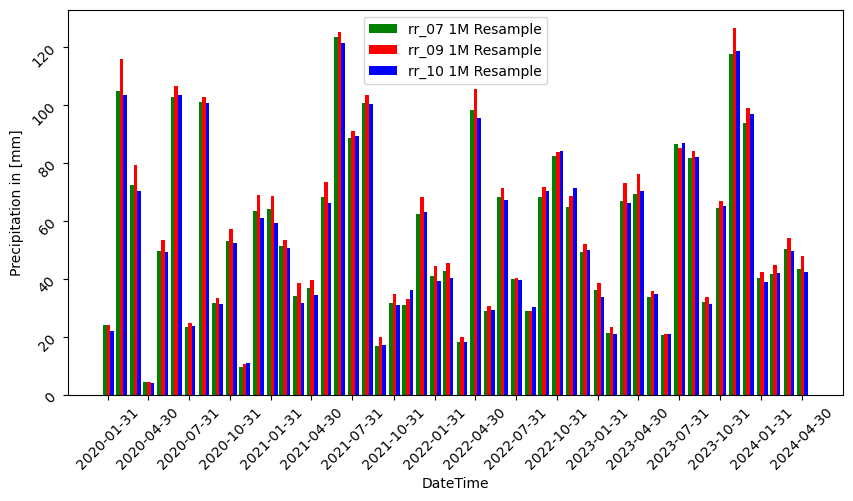

In [74]:
dataframe_1 = L_pcp_rtu_1M
column_1 = 'rr_07'
name_1 = 'rr_07 1M Resample'

dataframe_2 = L_pcp_rtu_1M
column_2 = 'rr_09'
name_2 = 'rr_09 1M Resample'

dataframe_3 = L_pcp_rtu_1M
column_3 = 'rr_10'
name_3 = 'rr_10 1M Resample'

dates = dataframe_1.index

x = mdates.date2num(dates)
width = 8
gap = 4

fig, ax = plt.subplots(figsize=(10, 5))

r1 = ax.bar(x - width - gap/2, dataframe_1[column_1], width, align='edge', color='green', label=name_1)
r2 = ax.bar(x - gap/2, dataframe_2[column_2], width, align='edge', color='red', label=name_2)
r3 = ax.bar(x + width - gap/2, dataframe_3[column_3], width, align='edge', color='blue', label=name_3)

# ax.set_title(name)

ax.set_xticks(x)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation in [mm]')

if len(dataframe_1.index) > 40:
    plt.xticks(dataframe_1.index[::3], rotation=45)
else:
    plt.xticks(dataframe_1.index, rotation=45)
    
plt.yticks(rotation=45)
plt.legend()

plt.show()

In [75]:
lhg05_rtu_1M = fct.resampleDf(lhg_rtu[['lhg05']], '1M', max_nan=1000000000)
lhg07_rtu_1M = fct.resampleDf(lhg_rtu[['lhg07']], '1M', max_nan=1000000000)
lhg09_rtu_1M = fct.resampleDf(lhg_rtu[['lhg09']], '1M', max_nan=1000000000)
lhg10_rtu_1M = fct.resampleDf(lhg_rtu[['lhg10']], '1M', max_nan=1000000000)
lhg11_rtu_1M = fct.resampleDf(lhg_rtu[['lhg11']], '1M', max_nan=1000000000)

In [76]:
# lhg05_rtu_1M.iloc[0].name

In [77]:
# print(lhg05_rtu_1M.iloc[0].name, lhg05_rtu_1M.iloc[-1].name)
# print(lhg07_rtu_1M.iloc[0].name, lhg07_rtu_1M.iloc[-1].name)
# print(lhg09_rtu_1M.iloc[0].name, lhg09_rtu_1M.iloc[-1].name)
# print(lhg10_rtu_1M.iloc[0].name, lhg10_rtu_1M.iloc[-1].name)
# print(lhg11_rtu_1M.iloc[0].name, lhg11_rtu_1M.iloc[-1].name)

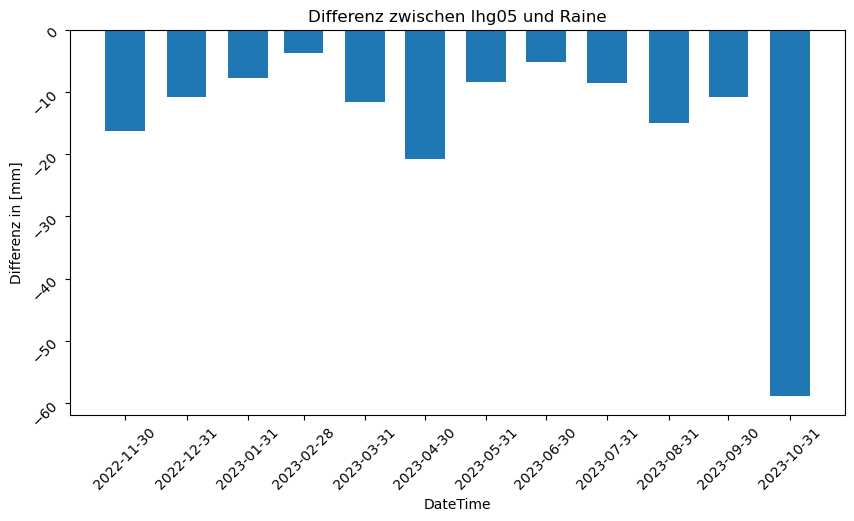

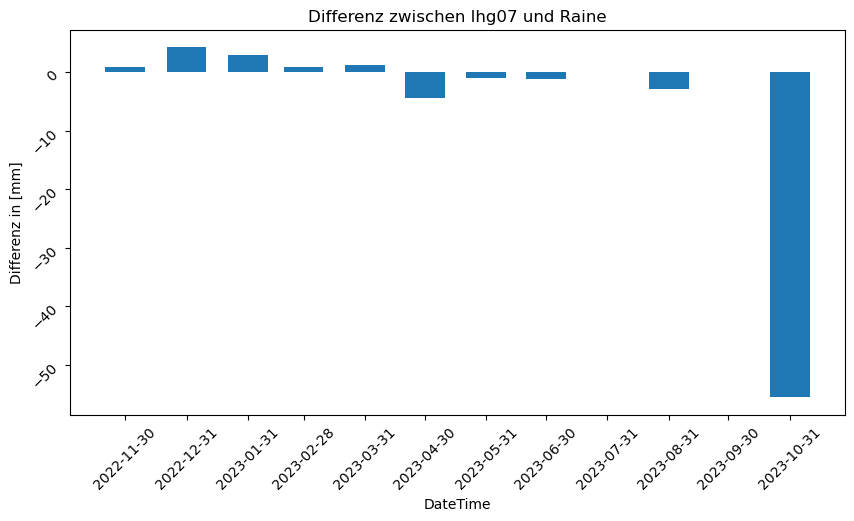

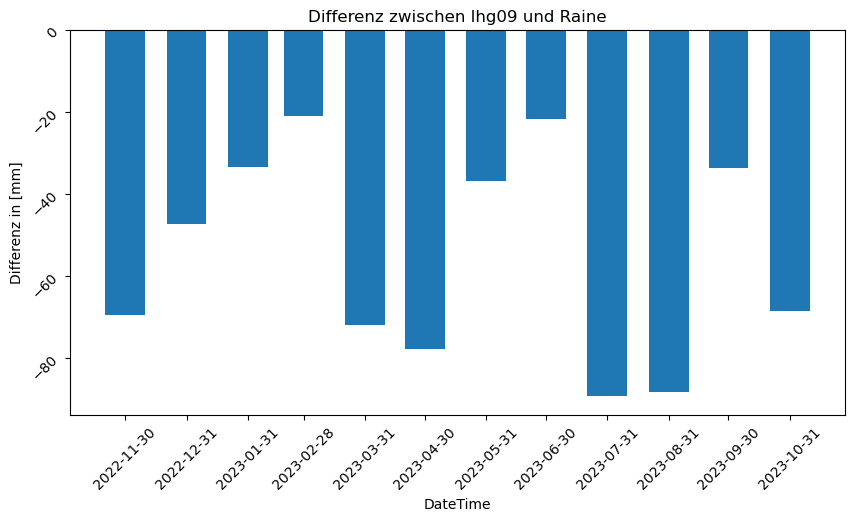

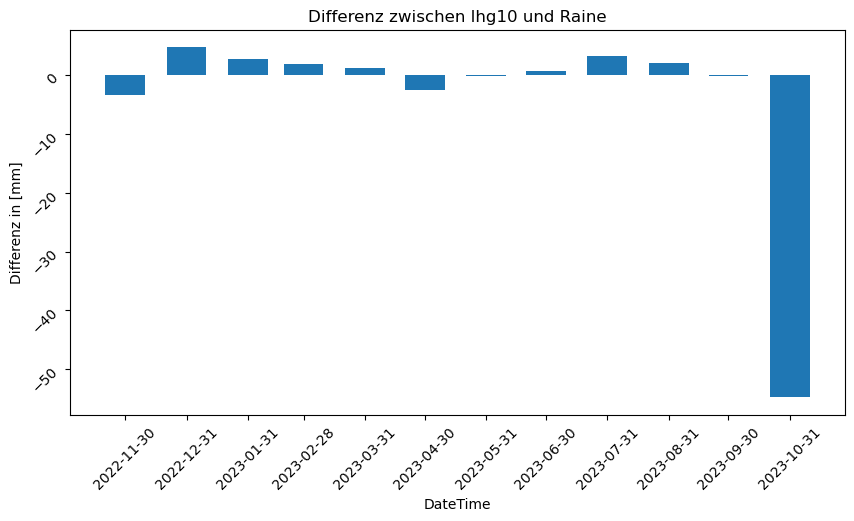

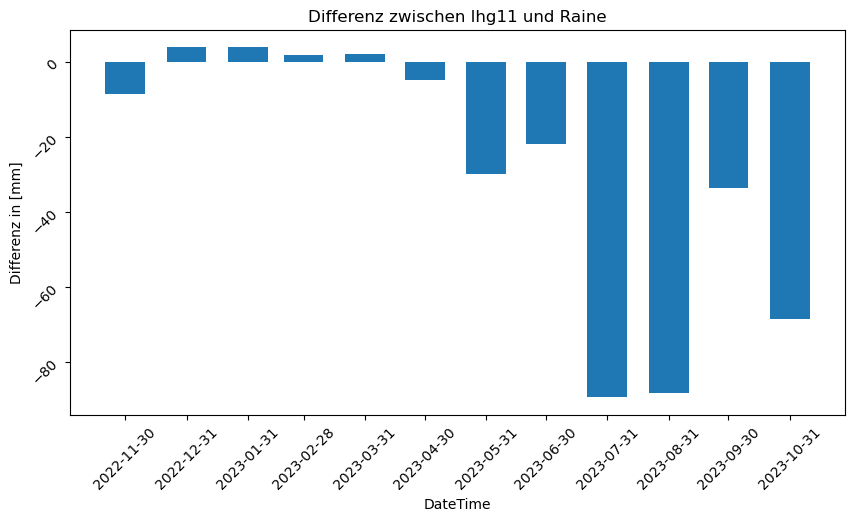

In [78]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[lhg05_rtu_1M['lhg05'], 'lhg05', 'Raine'],
                [lhg07_rtu_1M['lhg07'], 'lhg07', 'Raine'],
                [lhg09_rtu_1M['lhg09'], 'lhg09', 'Raine'],
                [lhg10_rtu_1M['lhg10'], 'lhg10', 'Raine'],
                [lhg11_rtu_1M['lhg11'], 'lhg11', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    for index in index_max_range:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
        
    plt.yticks(rotation=45)

    plt.show()

In [79]:
list_stations_columns = [[lhg05_rtu_1M, 'lhg05', 'lhg05 1M Resample'],
                        [lhg07_rtu_1M, 'lhg07', 'lhg07 1M Resample'],
                        [lhg09_rtu_1M, 'lhg09', 'lhg09 1M Resample'],
                        [lhg10_rtu_1M, 'lhg10', 'lhg10 1M Resample'],
                        [lhg11_rtu_1M, 'lhg11', 'lhg11 1M Resample']]

In [80]:
for list in list_stations_columns:
    balkendiagramm(list[0], list[1], list[2])

TypeError: balkendiagramm() missing 1 required positional argument: 'timedelta'